<a href="https://colab.research.google.com/github/shayanmalinda/Effective-identification-of-Nitrogen-Fertilizer-demand-for-Paddy-Cultivation-using-UAVs/blob/anupama/Models/(Anupama)shadow_removal_based_on_YCbCr_color_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving IMG_20210721_100231.jpg to IMG_20210721_100231.jpg


In [2]:
import numpy as np
import cv2

# read an image with shadow...
# and it converts to BGR color space automatically
or_img = cv2.imread("IMG_20210721_100231.jpg")
# or_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# covert the BGR image to an YCbCr image
y_cb_cr_img = cv2.cvtColor(or_img, cv2.COLOR_BGR2YCrCb)

# copy the image to create a binary mask later
binary_mask = np.copy(y_cb_cr_img)

# get mean value of the pixels in Y plane
y_mean = np.mean(cv2.split(y_cb_cr_img)[0])

# get standard deviation of channel in Y plane
y_std = np.std(cv2.split(y_cb_cr_img)[0])

# classify pixels as shadow and non-shadow pixels
for i in range(y_cb_cr_img.shape[0]):
    for j in range(y_cb_cr_img.shape[1]):

        if y_cb_cr_img[i, j, 0] < y_mean - (y_std / 3):
            # paint it white (shadow)
            binary_mask[i, j] = [255, 255, 255]
        else:
            # paint it black (non-shadow)
            binary_mask[i, j] = [0, 0, 0]

# Using morphological operation
# The misclassified pixels are
# removed using dilation followed by erosion.
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(binary_mask, kernel, iterations=1)

# sum of pixel intensities in the lit areas
spi_la = 0

# sum of pixel intensities in the shadow
spi_s = 0

# number of pixels in the lit areas
n_la = 0

# number of pixels in the shadow
n_s = 0

# get sum of pixel intensities in the lit areas
# and sum of pixel intensities in the shadow
for i in range(y_cb_cr_img.shape[0]):
    for j in range(y_cb_cr_img.shape[1]):
        if erosion[i, j, 0] == 0 and erosion[i, j, 1] == 0 and erosion[i, j, 2] == 0:
            spi_la = spi_la + y_cb_cr_img[i, j, 0]
            n_la += 1
        else:
            spi_s = spi_s + y_cb_cr_img[i, j, 0]
            n_s += 1

# get the average pixel intensities in the lit areas
average_ld = spi_la / n_la

# get the average pixel intensities in the shadow
average_le = spi_s / n_s

# difference of the pixel intensities in the shadow and lit areas
i_diff = average_ld - average_le

# get the ratio between average shadow pixels and average lit pixels
ratio_as_al = average_ld / average_le

# added these difference
for i in range(y_cb_cr_img.shape[0]):
    for j in range(y_cb_cr_img.shape[1]):
        if erosion[i, j, 0] == 255 and erosion[i, j, 1] == 255 and erosion[i, j, 2] == 255:

            y_cb_cr_img[i, j] = [y_cb_cr_img[i, j, 0] + i_diff, y_cb_cr_img[i, j, 1] + ratio_as_al,
                                 y_cb_cr_img[i, j, 2] + ratio_as_al]

# covert the YCbCr image to the BGR image
final_image = cv2.cvtColor(y_cb_cr_img, cv2.COLOR_YCR_CB2BGR)



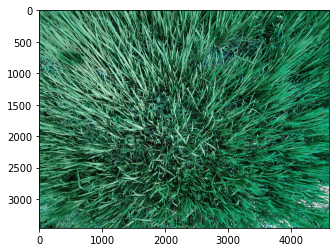

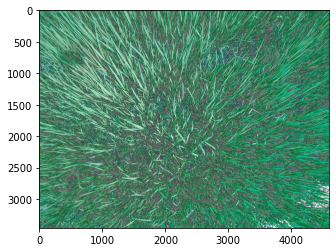

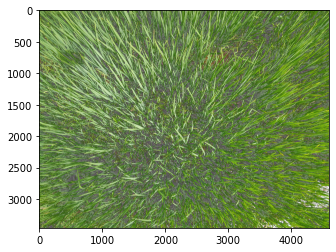

In [3]:
final_img= cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
from matplotlib import pyplot as plt

plt.imshow(or_img)
plt.show()
plt.imshow(final_image)
plt.show()
plt.imshow(final_img)
plt.show()